In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data_tot = pd.read_csv('../covid_italy/COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv')

In [51]:
# data_tot = pd.read_csv('../covid_italy/COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

## Data

data_tot (data at the national level) contains the cumulative of all the figures. I'm more interested in the daily variations.


In [52]:
cols = ['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
        'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']

cols_cum_apx = [x+"_cum" for x in cols ]
cols_daily_apx = [x+"_daily" for x in cols ]

data_tot = data_tot.rename(columns=dict(zip(cols,cols_cum_apx)))

In [53]:
data_tot[cols_daily_apx] = data_tot[['data','denominazione_regione']+cols_cum_apx].\
                sort_values(['denominazione_regione','data']).groupby('denominazione_regione').diff().\
                rename(columns=dict(zip(cols_cum_apx, cols_daily_apx)))

In [54]:
# data_tot[cols_daily_apx] = data_tot[cols_new_name].diff().rename(columns=dict(zip(cols_cum_apx, cols_daily_apx)))

data_tot = data_tot[sorted(data_tot.columns)].rename(columns={'data':'date'}).set_index('date')

In [55]:
pop_by_region = pd.read_csv("./pop_by_region_italy.csv")

In [56]:
data_tot['pct_positive_daily'] = data_tot.totale_positivi_daily/data_tot.tamponi_daily

In [57]:
data_tot = data_tot.reset_index().merge(pop_by_region, how='left', left_on='denominazione_regione',right_on='Region')

In [58]:
data_tot['ti_norm_cum'] = data_tot.terapia_intensiva_cum/data_tot.Population

In [59]:
data_tot

,date,casi_da_screening_cum,casi_da_screening_daily,casi_da_sospetto_diagnostico_cum,casi_da_sospetto_diagnostico_daily,casi_testati_cum,casi_testati_daily,codice_regione,deceduti_cum,deceduti_daily,...,totale_casi_daily,totale_ospedalizzati_cum,totale_ospedalizzati_daily,totale_positivi_cum,totale_positivi_daily,variazione_totale_positivi,pct_positive_daily,Region,Population,ti_norm_cum
0,2020-02-24T18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,Abruzzo,1305770.0,0.000000e+00
1,2020-02-24T18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,17,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,Basilicata,556934.0,0.000000e+00
2,2020-02-24T18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,18,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,Calabria,1924701.0,0.000000e+00
3,2020-02-24T18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,15,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,Campania,5785861.0,0.000000e+00
4,2020-02-24T18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,8,0,NaN,...,NaN,12,NaN,18,NaN,0,NaN,Emilia-Romagna,4467118.0,4.477160e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,2020-10-24T17:00:00,5792.0,370.0,10410.0,516.0,452738.0,5034.0,19,417,9.0,...,886.0,696,14.0,9889,753.0,753,0.105359,Sicilia,4968410.0,1.811445e-05
5120,2020-10-24T17:00:00,6233.0,329.0,23194.0,1197.0,662605.0,8886.0,9,1248,11.0,...,1526.0,727,71.0,15688,1314.0,1314,0.098287,Toscana,3722729.0,2.336995e-05
5121,2020-10-24T17:00:00,4420.0,400.0,2412.0,125.0,160255.0,2069.0,10,102,2.0,...,525.0,228,24.0,4021,391.0,391,0.099923,Umbria,880285.0,2.839989e-05
5122,2020-10-24T17:00:00,251.0,11.0,2177.0,101.0,24087.0,225.0,2,152,3.0,...,112.0,60,7.0,1093,92.0,92,0.222222,Valle d'Aosta,125501.0,1.593613e-05


### Data explanation:

- **totale_casi**: cumulative amount of positive cases recorded (no matter if dead or recovered)
- **totale_positivi**: cumulative amount of "active" positive cases . 

Therefore, **totale_positivi** = totale_casi - dimessi_guariti - deceduti

I'm interested in measuring the number of people tested positive over the total amount of swabs performed. Therefore: **totale_positive/totale_tamponi**

In [60]:
data_tot.index = data_tot['date'].apply(lambda x: x.split('T')[0])

In [63]:
data_tot = data_tot.drop(columns='date')

## Percentuale positivi su numero di test eseguiti

In [65]:
# f, ax = plt.subplots(1,figsize=(12,8))
# data_tot.pct_positive_daily.plot(label = 'Daily cases',ax=ax)
# data_tot.pct_positive_daily.rolling(7).mean().plot(label='Daily cases - MAV 7 days', ax=ax)

# # data_tot.pct_positive_daily.diff().plot(label = 'Daily cases',ax=ax[1])
# # data_tot.pct_positive_daily.rolling(7).mean().diff().plot(label='Daily cases - MAV 7 days', ax=ax[1])

# ax.set_title='Pct of positive cases over number of tests'
# ax.set_ylabel='Pct positive cases'
# ax.set_xlabel='Date'

# ax.grid()
# ax.legend()


## TI

National level

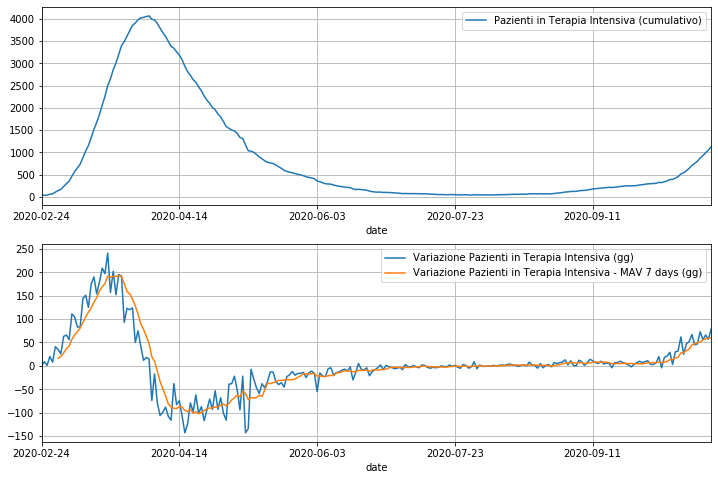

In [66]:
f, ax = plt.subplots(2,1,figsize=(12,8))

data_tot.groupby('date').terapia_intensiva_cum.sum().plot(label = 'Pazienti in Terapia Intensiva (cumulativo)',ax=ax[0])

data_tot.groupby('date').terapia_intensiva_daily.sum().plot(label = 'Variazione Pazienti in Terapia Intensiva (gg)',ax=ax[1])
data_tot.groupby('date').terapia_intensiva_daily.sum().rolling(7).mean().plot(label='Variazione Pazienti in Terapia Intensiva - MAV 7 days (gg)', ax=ax[1])



ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()

## Deceduti

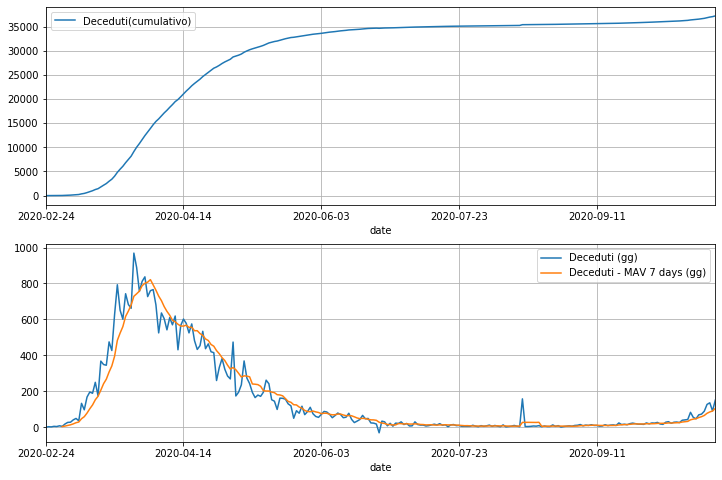

In [67]:

f, ax = plt.subplots(2,1,figsize=(12,8))

data_tot.groupby('date').deceduti_cum.sum().plot(label = 'Deceduti(cumulativo)',ax=ax[0])

data_tot.groupby('date').deceduti_daily.sum().plot(label = 'Deceduti (gg)',ax=ax[1])
data_tot.groupby('date').deceduti_daily.sum().rolling(7).mean().plot(label='Deceduti - MAV 7 days (gg)', ax=ax[1])



ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()

## Infetti

In [68]:

# f, ax = plt.subplots(2,1,figsize=(12,8))

# data_tot.totale_positivi_cum.plot(label = 'Positivi(cumulativo)',ax=ax[0])

# data_tot.totale_positivi_daily.plot(label = 'Positivi (gg)',ax=ax[1])
# data_tot.totale_positivi_daily.rolling(7).mean().plot(label='Positivi - MAV 7 days (gg)', ax=ax[1])



# ax[0].grid()
# ax[1].grid()
# ax[0].legend()
# ax[1].legend()

# Regional dataset

In [74]:
regional_df = data_tot.groupby(['date','denominazione_regione'])[['ricoverati_con_sintomi_cum',
                                                    'ricoverati_con_sintomi_daily',
                                                    'terapia_intensiva_cum',
                                                    'terapia_intensiva_daily',
                                                    'totale_ospedalizzati_cum',
                                                    'totale_ospedalizzati_daily',
                                                    'deceduti_cum',
                                                    'deceduti_daily',
                                                    'ti_norm_cum'
                                                   ]].sum()

In [75]:
regional_ti = regional_df['terapia_intensiva_cum'].reset_index().pivot_table(index='date', columns='denominazione_regione',values='terapia_intensiva_cum')

In [76]:
regional_hospit = regional_df['totale_ospedalizzati_cum'].reset_index().pivot_table(index='date', columns='denominazione_regione',values='totale_ospedalizzati_cum')

In [77]:
regional_ti_norm = regional_df['ti_norm_cum'].reset_index().pivot_table(index='date', columns='denominazione_regione',values='ti_norm_cum')

In [84]:
regional_ti_norm.apply(max).sort_values()

denominazione_regione
P.A. Trento              0.000000
P.A. Bolzano             0.000000
Calabria                 0.000012
Sicilia                  0.000018
Sardegna                 0.000022
Molise                   0.000030
Campania                 0.000031
Basilicata               0.000034
Lazio                    0.000035
Puglia                   0.000040
Friuli Venezia Giulia    0.000050
Umbria                   0.000055
Abruzzo                  0.000058
Veneto                   0.000073
Toscana                  0.000080
Emilia-Romagna           0.000084
Piemonte                 0.000104
Marche                   0.000111
Liguria                  0.000116
Lombardia                0.000137
Valle d'Aosta            0.000215
dtype: float64

## Total period

Text(0.5, 1.0, 'Terapia intensiva normalizzato popolazione')

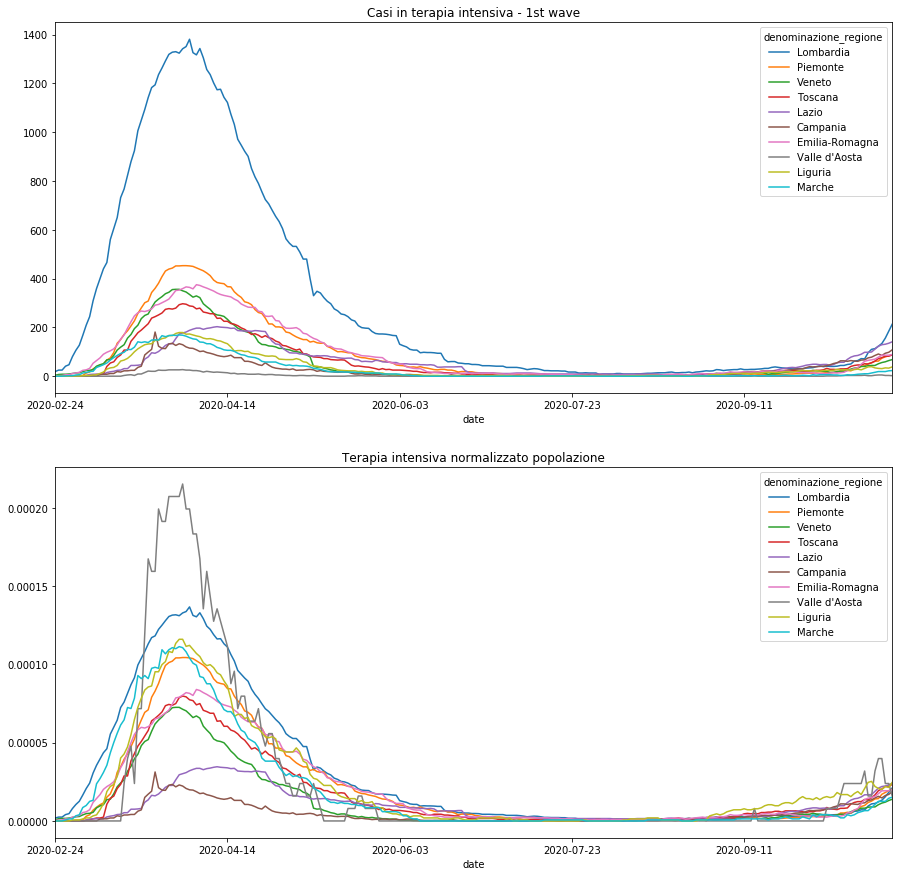

In [86]:
f, ax = plt.subplots(2,1,figsize=(15,15))
regional_ti[['Lombardia','Piemonte','Veneto','Toscana',
             'Lazio','Campania','Emilia-Romagna',"Valle d'Aosta", "Liguria", "Marche"]].plot(ax=ax[0])


regional_ti_norm[['Lombardia','Piemonte','Veneto','Toscana',
             'Lazio','Campania','Emilia-Romagna',"Valle d'Aosta", "Liguria", "Marche"]].plot(ax=ax[1])




ax[0].set_title('Casi in terapia intensiva - 1st wave')
ax[1].set_title('Terapia intensiva normalizzato popolazione')
# ax.set_yscale('log')

## Second wave

Text(0.5, 1.0, 'terapia intensiva normalizzato')

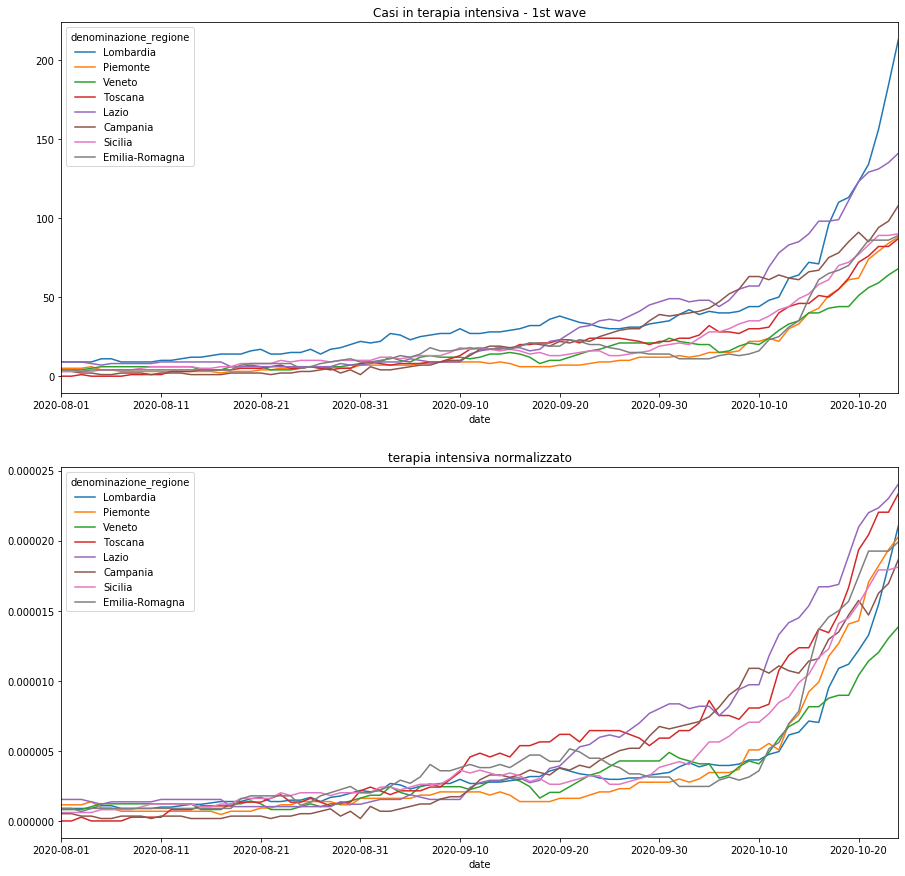

In [82]:
f, ax = plt.subplots(2,1,figsize=(15,15))
regional_ti.loc['2020-08-01':][['Lombardia','Piemonte','Veneto','Toscana',
             'Lazio','Campania','Sicilia','Emilia-Romagna']].plot(ax=ax[0])


regional_ti_norm.loc['2020-08-01':][['Lombardia','Piemonte','Veneto','Toscana',
             'Lazio','Campania','Sicilia','Emilia-Romagna']].plot(ax=ax[1])




ax[0].set_title('Casi in terapia intensiva - 1st wave')
ax[1].set_title('terapia intensiva normalizzato')
# ax.set_yscale('log')